In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import files


uploaded = files.upload()


In [ ]:
df=pd.read_csv('corpus_new.csv', encoding='unicode_escape')

In [ ]:
df

,text,label
0,Stuning even for the non-gamer: This sound tr...,2
1,The best soundtrack ever to anything.: I'm re...,2
2,Amazing!: This soundtrack is my favorite musi...,2
3,Excellent Soundtrack: I truly like this sound...,2
4,"Remember, Pull Your Jaw Off The Floor After H...",2
...,...,...
9995,A revelation of life in small town America in...,2
9996,Great biography of a very interesting journal...,2
9997,Interesting Subject; Poor Presentation: You'd...,1
9998,Don't buy: The box looked used and it is obvi...,1


In [ ]:
# Length of each review
df['review_length'] = df['text'].str.len()

In [ ]:
# Number of words in each review
df['word_count'] = df['text'].str.split().str.len()

In [ ]:
# Number of Sentences in each review
df['sentence_count'] = ''
for i in range(len(df)):
  sentence = sent_tokenize(df['text'][i])
  df['sentence_count'][i] = len(sentence)

<ipython-input-7-d7ebfb7f3dbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence_count'][i] = len(sentence)


In [ ]:
df

,text,label,review_length,word_count,sentence_count
0,Stuning even for the non-gamer: This sound tr...,2,428,80,6
1,The best soundtrack ever to anything.: I'm re...,2,510,97,4
2,Amazing!: This soundtrack is my favorite musi...,2,761,129,4
3,Excellent Soundtrack: I truly like this sound...,2,744,118,4
4,"Remember, Pull Your Jaw Off The Floor After H...",2,482,87,5
...,...,...,...,...,...
9995,A revelation of life in small town America in...,2,868,152,4
9996,Great biography of a very interesting journal...,2,862,141,5
9997,Interesting Subject; Poor Presentation: You'd...,1,651,108,7
9998,Don't buy: The box looked used and it is obvi...,1,136,27,3


### Readability Metrics
We will be using the `textstat` package of Python to calculate the Readability metrics

In [ ]:
pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00


In [ ]:
import textstat

#### FOG Score

The Gunning fog index measures the readability of English writing. The index estimates the years of formal education needed to understand the text on a first reading. A fog index of 12 requires the reading level of a U.S. high school senior (around 18 years old).

In [ ]:
df['FOG Index'] = ''
for i in range(len(df)):
  df['FOG Index'][i] = textstat.gunning_fog(df['text'][i])

<ipython-input-11-acc83fefc5df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FOG Index'][i] = textstat.gunning_fog(df['text'][i])


#### SMOG Index

The SMOG Readability Formula (Simple Measure of Gobbledygook) is a popular method to use on health literacy materials.

In [ ]:
df['SMOG Index'] = ''
for i in range(len(df)):
  df['SMOG Index'][i] = textstat.smog_index(df['text'][i])

<ipython-input-12-bfdf1654b0b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMOG Index'][i] = textstat.smog_index(df['text'][i])


In [ ]:
df

,text,label,review_length,word_count,sentence_count,FOG Index,SMOG Index
0,Stuning even for the non-gamer: This sound tr...,2,428,80,6,7.4,7.6
1,The best soundtrack ever to anything.: I'm re...,2,510,97,4,10.23,9.4
2,Amazing!: This soundtrack is my favorite musi...,2,761,129,4,13.05,11.2
3,Excellent Soundtrack: I truly like this sound...,2,744,118,4,9.4,11.2
4,"Remember, Pull Your Jaw Off The Floor After H...",2,482,87,5,8.8,8.8
...,...,...,...,...,...,...,...
9995,A revelation of life in small town America in...,2,868,152,4,14.79,13.3
9996,Great biography of a very interesting journal...,2,862,141,5,17.24,17.6
9997,Interesting Subject; Poor Presentation: You'd...,1,651,108,7,12.39,12.5
9998,Don't buy: The box looked used and it is obvi...,1,136,27,3,5.08,6.4


### Word Cloud and Unigrams

#### Generating a Word Cloud for the entire reviews data

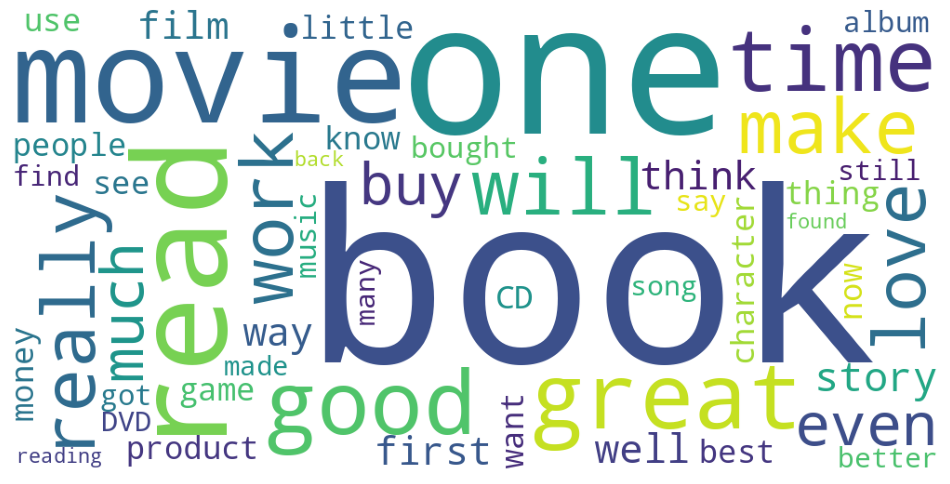

In [ ]:
large_review = []
for i in range(len(df)):
  large_review.append(df['text'][i])

unique_string = (" ").join(large_review)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white', max_words=50).generate(unique_string)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

`basic_clean()` function will do some basic pre-processing on the text and converts it to a list of words

In [ ]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
words = basic_clean(unique_string)

In [ ]:
words[:10]

['stuning',
 'even',
 'nongamer',
 'sound',
 'track',
 'beautiful',
 'paint',
 'senery',
 'mind',
 'well']

Finding the 30 most common unigrams in the dataset

In [ ]:
(pd.Series(nltk.ngrams(words, 1)).value_counts())[:30]

(book,)         7543
(one,)          4055
(movie,)        3020
(like,)         2888
(read,)         2812
(good,)         2775
(great,)        2722
(time,)         2407
(would,)        2381
(get,)          2220
(dont,)         1771
(story,)        1612
(really,)       1604
(make,)         1465
(first,)        1444
(work,)         1440
(much,)         1419
(even,)         1400
(well,)         1371
(love,)         1354
(buy,)          1243
(year,)         1163
(best,)         1108
(better,)       1100
(could,)        1095
(product,)      1086
(thing,)        1047
(think,)        1034
(character,)    1026
(way,)          1020
dtype: int64

Visualizing the results

Text(0.5, 0, '# of Occurances')

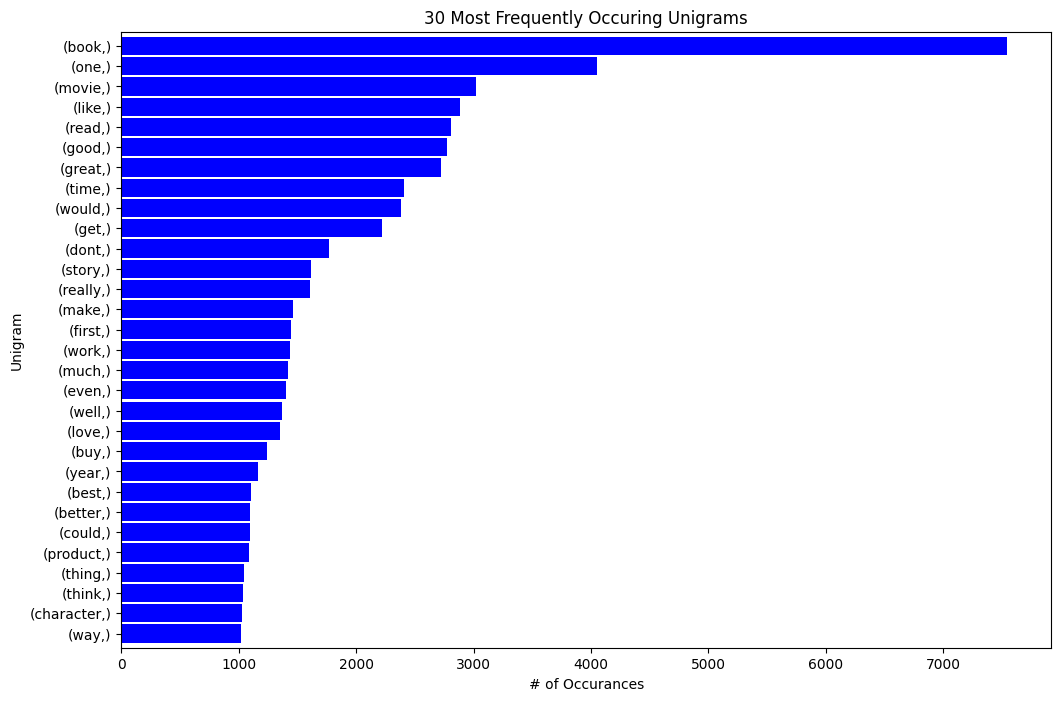

In [ ]:
unigram_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:30]
unigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('30 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

Finding the 30 most common bigrams in the dataset

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

(read, book)           460
(waste, money)         236
(year, old)            219
(would, recommend)     210
(one, best)            183
(book, read)           183
(waste, time)          177
(dont, waste)          167
(good, book)           162
(great, book)          160
(much, better)         154
(reading, book)        152
(year, ago)            151
(first, time)          145
(dont, know)           145
(highly, recommend)    145
(dont, buy)            142
(ever, read)           137
(special, effect)      131
(recommend, book)      128
(look, like)           124
(ive, ever)            123
(book, ever)           114
(im, sure)             108
(book, book)           108
(save, money)          107
(book, great)          106
(even, though)         106
(book, one)            102
(high, school)         102
dtype: int64

Text(0.5, 0, '# of Occurances')

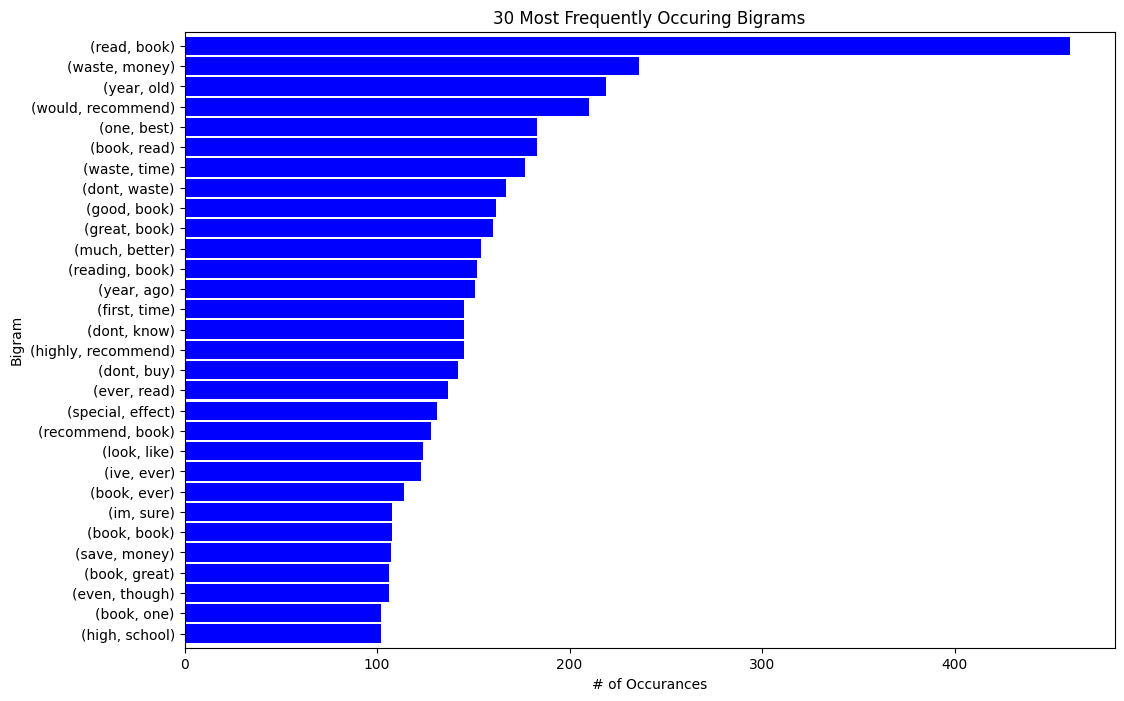

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('30 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

### Sentiment Analysis using VADER technique

VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


VADER's `SentimentIntensityAnalyzer()` takes in a string and returns a dictionary of scores in each of four categories:

* negative
* neutral
* positive
* compound (computed by normalizing the scores above)


In [ ]:
df['label'].value_counts()

1    5097
2    4903
Name: label, dtype: int64

Adding scores and labels to the DataFrame

Now we'll add columns to the original DataFrame to store `polarity_score` dictionaries, extracted compound scores, and new "pos/neg" labels dreived from the compound score

In [ ]:
df['VADER_scores'] = df['text'].apply(lambda x: sid.polarity_scores(x))

In [ ]:
df.head()

,text,label,review_length,word_count,sentence_count,FOG Index,SMOG Index,VADER_scores
0,Stuning even for the non-gamer: This sound tr...,2,428,80,6,7.4,7.6,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,The best soundtrack ever to anything.: I'm re...,2,510,97,4,10.23,9.4,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,Amazing!: This soundtrack is my favorite musi...,2,761,129,4,13.05,11.2,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,Excellent Soundtrack: I truly like this sound...,2,744,118,4,9.4,11.2,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,"Remember, Pull Your Jaw Off The Floor After H...",2,482,87,5,8.8,8.8,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


Now we will call out compound as a seperate column and all the values greater than zeros will be considered as positive review and all values less than zero would be considere as a negative review

In [ ]:
df['compound']  = df['VADER_scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
df['VADER_sentiment'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
del df['compound']
df.head()

,text,label,review_length,word_count,sentence_count,FOG Index,SMOG Index,VADER_scores,VADER_sentiment
0,Stuning even for the non-gamer: This sound tr...,2,428,80,6,7.4,7.6,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",pos
1,The best soundtrack ever to anything.: I'm re...,2,510,97,4,10.23,9.4,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",pos
2,Amazing!: This soundtrack is my favorite musi...,2,761,129,4,13.05,11.2,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",pos
3,Excellent Soundtrack: I truly like this sound...,2,744,118,4,9.4,11.2,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",pos
4,"Remember, Pull Your Jaw Off The Floor After H...",2,482,87,5,8.8,8.8,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",pos


Thus, we achieve the sentiments using the VADER technique.

In [ ]:
df

,text,label,review_length,word_count,sentence_count,FOG Index,SMOG Index,VADER_scores,VADER_sentiment
0,Stuning even for the non-gamer: This sound tr...,2,428,80,6,7.4,7.6,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",pos
1,The best soundtrack ever to anything.: I'm re...,2,510,97,4,10.23,9.4,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",pos
2,Amazing!: This soundtrack is my favorite musi...,2,761,129,4,13.05,11.2,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",pos
3,Excellent Soundtrack: I truly like this sound...,2,744,118,4,9.4,11.2,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",pos
4,"Remember, Pull Your Jaw Off The Floor After H...",2,482,87,5,8.8,8.8,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",pos
...,...,...,...,...,...,...,...,...,...
9995,A revelation of life in small town America in...,2,868,152,4,14.79,13.3,"{'neg': 0.017, 'neu': 0.846, 'pos': 0.136, 'co...",pos
9996,Great biography of a very interesting journal...,2,862,141,5,17.24,17.6,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...",pos
9997,Interesting Subject; Poor Presentation: You'd...,1,651,108,7,12.39,12.5,"{'neg': 0.084, 'neu': 0.754, 'pos': 0.162, 'co...",pos
9998,Don't buy: The box looked used and it is obvi...,1,136,27,3,5.08,6.4,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",neg


### Emotion analysis using NRCLex

NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, and is based on the National Research Council Canada (NRC) affect lexicon and the NLTK library's WordNet synonym sets.

Emotional affects measured include the following:

*   Fear
*   Anger
*   Anticipation
*   Trust
*   Surprise
*   Positive
*   Negative
*   Sadness
*   Disgust
*   Joy



In [ ]:
pip install NRCLex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43327 sha256=a154471472a1fd8cb8793a695366035c7c60bdba39689786d9c2a2649343add3
  Stored in directory: /root/.cache/pip/wheels/68/c4/f2/c390dd3eac398fdf45f7a01c6516bc53fa7a9ab59c7d2ff518
Successfully built NRCLex


In [ ]:
from nrclex import NRCLex

`top_emotions()` returns highest emotions

In [ ]:
df['NRCLex_emotion'] = ''
for i in range(len(df)):
  df['NRCLex_emotion'][i] = NRCLex(df['text'][i]).raw_emotion_scores

<ipython-input-31-cc69ebc152e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NRCLex_emotion'][i] = NRCLex(df['text'][i]).raw_emotion_scores


In [ ]:
gu

0     {'anticipation': 1, 'joy': 3, 'positive': 4, '...
1     {'positive': 7, 'anger': 2, 'negative': 2, 'an...
2     {'joy': 6, 'positive': 10, 'trust': 5, 'sadnes...
3     {'anticipation': 2, 'joy': 5, 'positive': 6, '...
4     {'joy': 4, 'positive': 4, 'sadness': 3, 'antic...
                            ...                        
95    {'negative': 4, 'positive': 2, 'trust': 2, 'an...
96    {'anticipation': 4, 'joy': 4, 'positive': 5, '...
97             {'joy': 3, 'negative': 2, 'positive': 1}
98                          {'positive': 1, 'trust': 1}
99                                      {'negative': 1}
Name: NRCLex_emotion, Length: 100, dtype: object

In [ ]:
df.head(20)

,text,label,review_length,word_count,sentence_count,FOG Index,SMOG Index,VADER_scores,VADER_sentiment,NRCLex_emotion
0,Stuning even for the non-gamer: This sound tr...,2,428,80,6,7.4,7.6,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",pos,"{'anticipation': 1, 'joy': 3, 'positive': 4, '..."
1,The best soundtrack ever to anything.: I'm re...,2,510,97,4,10.23,9.4,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",pos,"{'positive': 7, 'anger': 2, 'negative': 2, 'an..."
2,Amazing!: This soundtrack is my favorite musi...,2,761,129,4,13.05,11.2,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",pos,"{'joy': 6, 'positive': 10, 'trust': 5, 'sadnes..."
3,Excellent Soundtrack: I truly like this sound...,2,744,118,4,9.4,11.2,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",pos,"{'anticipation': 2, 'joy': 5, 'positive': 6, '..."
4,"Remember, Pull Your Jaw Off The Floor After H...",2,482,87,5,8.8,8.8,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",pos,"{'joy': 4, 'positive': 4, 'sadness': 3, 'antic..."
5,an absolute masterpiece: I am quite sure any ...,2,826,142,4,15.25,14.0,"{'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co...",pos,"{'positive': 8, 'joy': 3, 'anticipation': 1, '..."
6,"Buyer beware: This is a self-published book, ...",1,739,139,7,7.02,7.8,"{'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co...",neg,"{'anticipation': 2, 'fear': 2, 'negative': 4, ..."
7,Glorious story: I loved Whisper of the wicked...,2,523,105,9,6.35,7.2,"{'neg': 0.072, 'neu': 0.583, 'pos': 0.346, 'co...",pos,"{'fear': 5, 'negative': 4, 'surprise': 5, 'ant..."
8,A FIVE STAR BOOK: I just finished reading Whi...,2,525,103,7,7.8,8.0,"{'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co...",pos,"{'positive': 10, 'negative': 3, 'sadness': 4, ..."
9,Whispers of the Wicked Saints: This was a eas...,2,302,63,4,6.95,6.0,"{'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com...",pos,"{'positive': 2, 'negative': 1, 'sadness': 1, '..."
